# Philip Carr
# CS/CNS/EE_156a_Homework_4_Code_Part_1 (Jupyter Notebook)

Code for Generalizaition Error (Problems 2 and 3)

In [27]:
import numpy as np
from matplotlib import pyplot as plt

In [28]:
def original_vc_bound(N, d_vc=50, delta=0.05):
    if N <= d_vc:
        # hypothesis set shatters dataset here
        m_H = np.power(2, 2 * N)
    else:
        m_H = np.power(2 * N, d_vc)
    return np.sqrt((8.0 / N) * np.log(4.0 * m_H / delta))

In [29]:
def rademacher_penalty_bound(N, d_vc=50, delta=0.05):
    if N <= d_vc:
        m_H = np.power(2, N)
    else:
        m_H = np.power(N, d_vc)
    return np.sqrt(2.0 * np.log(2.0 * N * m_H) / N) \
           + np.sqrt((2.0 / N) * np.log(1.0 / delta)) \
           + (1.0 / N)

In [30]:
def p_and_vb_upper_bound(N, m_H, d_vc, delta, epsilon):
    return np.sqrt((1.0 / N) * (2 * epsilon
                                + np.log(6 * m_H / delta)))

In [31]:
def p_and_vb_penalty_bound(N, d_vc=50, delta=0.05, step=0.01, max_epsilon=100):
    if N <= d_vc:
        m_H = np.power(2, 2 * N)
    else:
        m_H = np.power(2 * N, d_vc)
    epsilon_upper_bound = 0.0
    prev_upper_bound = p_and_vb_upper_bound(N, m_H, d_vc, delta,
                                              epsilon_upper_bound)
    while epsilon_upper_bound <= max_epsilon:
        #print("epsilon =", epsilon_upper_bound)
        upper_bound = p_and_vb_upper_bound(N, m_H, d_vc, delta,
                                             epsilon_upper_bound)
        if epsilon_upper_bound > upper_bound:
            #upper_bound = prev_upper_bound
            #print("HEY")
            return prev_upper_bound
        else:
            prev_upper_bound = upper_bound
            epsilon_upper_bound += step

In [32]:
def devroye_upper_bound(N, log_m_H, d_vc, delta, epsilon):
    return np.sqrt((1.0 / (2.0 * N)) * (4 * epsilon * (1 + epsilon)
                                        + log_m_H
                                        + np.log(4 / delta)))

In [33]:
def devroye_penalty_bound(N, d_vc=50, delta=0.05, step=0.01, max_epsilon=100):
    if N <= d_vc:
        log_m_H = N * N * np.log(2)
    else:
        log_m_H = d_vc * np.log(N * N)
    epsilon_upper_bound = 0.0
    prev_upper_bound = devroye_upper_bound(N, log_m_H, d_vc, delta,
                                              epsilon_upper_bound)
    while epsilon_upper_bound <= max_epsilon:
        #print("epsilon2 =", epsilon_upper_bound)
        upper_bound = devroye_upper_bound(N, log_m_H, d_vc, delta,
                                             epsilon_upper_bound)
        if epsilon_upper_bound > upper_bound:
            #upper_bound = prev_upper_bound
            #print("HEY2")
            return prev_upper_bound
        else:
            prev_upper_bound = upper_bound
            epsilon_upper_bound += step

In [34]:
N_values = list(np.logspace(0, 4, num=100))

original_vc_bound_list = []
rademacher_penalty_bound_list = []
p_and_vb_penalty_bound_list = []
devroye_penalty_bound_list = []

for N in N_values:
    #print("N =", N)
    original_vc_bound_list.append(original_vc_bound(N))
    #print("o")
    rademacher_penalty_bound_list.append(rademacher_penalty_bound(N))
    #print("r")
    p_and_vb_penalty_bound_list.append(p_and_vb_penalty_bound(N))
    #print("p")
    #print("d")
    devroye_penalty_bound_list.append(devroye_penalty_bound(N))
    #print("d")

For Problem 2

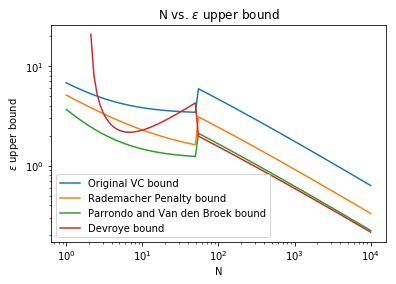

In [38]:
plt.title("N vs. $\epsilon$ upper bound")
plt.ylabel("$\epsilon$ upper bound")
plt.xlabel("N")
plt.xscale("log")
plt.yscale("log")
plt.plot(N_values, original_vc_bound_list, label="Original VC bound")
plt.plot(N_values, rademacher_penalty_bound_list,
         label="Rademacher Penalty bound")
plt.plot(N_values, p_and_vb_penalty_bound_list,
         label="Parrondo and Van den Broek bound")
plt.plot(N_values, devroye_penalty_bound_list, label="Devroye bound")
plt.legend()

In [36]:
N_2 = 10000.0
print("Original VC bound for N =",
      int(N_2), ":", original_vc_bound(N_2))
print("Rademacher Penalty bound for N =",
      int(N_2), ":", rademacher_penalty_bound(N_2))
print("Parrondo and Van den Broek bound for N =",
      int(N_2), ":", p_and_vb_penalty_bound(N_2))
print("Devroye bound for N =",
      int(N_2), ":", devroye_penalty_bound(N_2))

Original VC bound for N = 10000 : 0.632174915200836
Rademacher Penalty bound for N = 10000 : 0.3313087859616395
Parrondo and Van den Broek bound for N = 10000 : 0.223696640423943
Devroye bound for N = 10000 : 0.215224587795202


For Problem 3

In [37]:
N_3 = 5.0
print("Original VC bound for N =",
      int(N_3), ":", original_vc_bound(N_3))
print("Rademacher Penalty bound for N =",
      int(N_3), ":", rademacher_penalty_bound(N_3))
print("Parrondo and Van den Broek bound for N =",
      int(N_3), ":", p_and_vb_penalty_bound(N_3))
print("Devroye bound for N =",
      int(N_3), ":", devroye_penalty_bound(N_3))

Original VC bound for N = 5 : 4.254597220000659
Rademacher Penalty bound for N = 5 : 2.813654929686762
Parrondo and Van den Broek bound for N = 5 : 1.7435001318257193
Devroye bound for N = 5 : 2.2623241621985213
